# k—Nearest Neighbors

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.


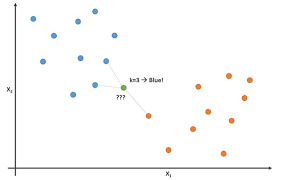

### basic information:
The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.

KNN is a lazy learning and non-parametric algorithm.

Consider there are two groups, A and B:

    To determine whether a data point is in group A or group B, the algorithm looks at the states of the data points near it. If the majority of data points are in group A, it's very likely that the data point in question is in group A and vice versa.

    In short, KNN involves classifying a data point by looking at the nearest annotated data point, also known as the nearest neighbor.

### K-nearest neighbor algorithm pseudocode: 

Programming languages:

1. Load the data
2. Choose K value
3. For each data point in the data:
4. Find the Euclidean distance to all training data samples
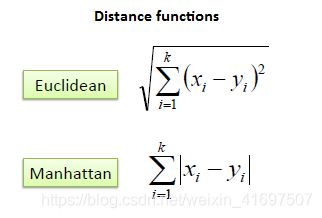

    if we are using Manhattan distance, then we need to consider this : 
   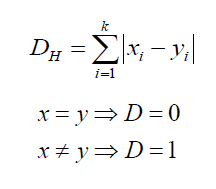
5. Store the distances on an ordered list and sort it
6. Choose the top K entries from the sorted list
7. Label the test point based on the majority of classes present in the selected points
8. End

In [16]:
#Read the file
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#Impute missing values
df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [18]:
# Deal with categorical variables and drop the id columns
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [19]:
from sklearn.model_selection import train_test_split
# Create train and test set
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [21]:
# Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)


In [7]:
#Let us have a look at the error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


### Output:

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 1600.7209510608614
RMSE value for k=  2 is: 1377.084478293975
RMSE value for k=  3 is: 1290.3844754648728
RMSE value for k=  4 is: 1252.4610022366521
RMSE value for k=  5 is: 1231.8021641794944
RMSE value for k=  6 is: 1210.7555649615056
RMSE value for k=  7 is: 1200.7024296749048
RMSE value for k=  8 is: 1196.5896198743476
RMSE value for k=  9 is: 1196.9692807955037
RMSE value for k=  10 is: 1198.7305741567957
RMSE value for k=  11 is: 1196.6904248975816
RMSE value for k=  12 is: 1196.7880683284325
RMSE value for k=  13 is: 1202.85314538907
RMSE value for k=  14 is: 1205.1888927276862
RMSE value for k=  15 is: 1209.3930403715408
RMSE value for k=  16 is: 1213.2895201764734
RMSE value for k=  17 is: 1219.6789085387989
RMSE value for k=  18 is: 1227.5582616779138
RMSE value for k=  19 is: 1232.2982156622613
RMSE value for k=  20 is: 1239.0859954707707


<AxesSubplot:>

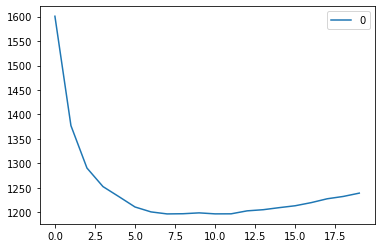

In [9]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


When k=1, we get a very high RMSE value, which is 1600.7209510608614. Form then graph, I find with the best RMSE value is give by k=7. Additionally, if k is greater than 7, the RMSE value will continuously grow bigger. 

In [23]:
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

In [12]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [24]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2331.346257
1,FDW14,OUT017,1181.509657
2,NCN55,OUT010,420.024686
3,FDQ58,OUT017,2674.043029
4,FDY38,OUT027,6397.577086
